<a href="https://colab.research.google.com/github/AurelienGgt/Customer-Personality-Analysis/blob/main/Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import of data + library + Dependance (if needed)

## Access to google drive

In [1]:
# Mount access to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import library

In [2]:
# Library
import pandas as pd

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# for random error
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Access of the data

In [3]:
df = pd.read_csv('/content/drive/My Drive/Customer Personality Analysis/marketing_campaign.csv',sep='\t') # We have a separator here

## Visualisation of the dataframe

### Visualisation of the missing value

In [4]:
print(f"The number of missing value are : {df.isna().sum().count()} ")

The number of missing value are : 29 


### Modify the date

# Visualisation of categorical column

In [5]:
df # Visualisation of the dataframe

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Before we start our analyse I will rename some colums like the products.

In [6]:
# Rename columns
df = df.rename(columns={
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold'
})

First let's check some categorical columns

Because we will check multiple column, it's better to create a function instead of writing the same code all the time.

This function will help us to visualise the categorical column we want to focus

In [7]:
def categorical_visualisation(col) :

  """
  This function will help us to visualise the categorical column we want to focus
  We put the visualisation as countplot but a pie was also possible.

  Args:
      col: The name of the column to visualize.
  """

# On this part we are watching directly the value
  print(f"Visualisation of the Value for {col}: ")
  print("")
  column = df[col].value_counts()
  print(column)

# We are using print('') to make some space
  print('')
  print('')

# On this part we are watching directly the visualisation
  print(f"Graphic of the visualisation for {col}: ")
  print("")
  sorted_cat= df[col].value_counts().index
  ax = sns.countplot(x=col, data=df, hue=col, palette="magma", dodge=False, legend=False,order=sorted_cat) # color preference here

  # We add the count of the top of the column :
  for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, fontweight='bold', color='black')


  # Add axis labels
  plt.xticks(rotation=45) # Rotation of the label for a better visualisation
  plt.xlabel(col) # Label for x
  plt.title(f"Visualisation of the column : {col}")
  plt.ylabel("Amount of people") # Label for y
  plt.grid(True) # Preference to see the grid
  plt.show()

In [8]:
def visualisation_groupby(df):

    """
    Visualise grouped data using subplots in Seaborn (removed the Plotly because was not useful for Github).

    Args:
        df (pd.DataFrame): A DataFrame with groupby data.
    """
    products = ['Fish', 'Wines', 'Fruits', 'Meat', 'Sweets', 'Gold']

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()  # Permet d'accéder aux axes sous forme de liste

    for i, product in enumerate(products):
        if product in df.columns:
            sns.barplot(x=df.index, y=df[product], ax=axes[i])
            max_height = max(df[product]) * 1.1  # Ajuster la hauteur du graphique
            axes[i].set_ylim(0, max_height)
            for p in axes[i].patches:
                axes[i].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() + max_height * 0.02),
                                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
            axes[i].set_title(f"{product} Purchases")
            axes[i].set_xticklabels(df.index, rotation=45)

    plt.tight_layout()
    plt.show()

## Column : Education

Visualisation of the Value for Education: 

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Graphic of the visualisation for Education: 



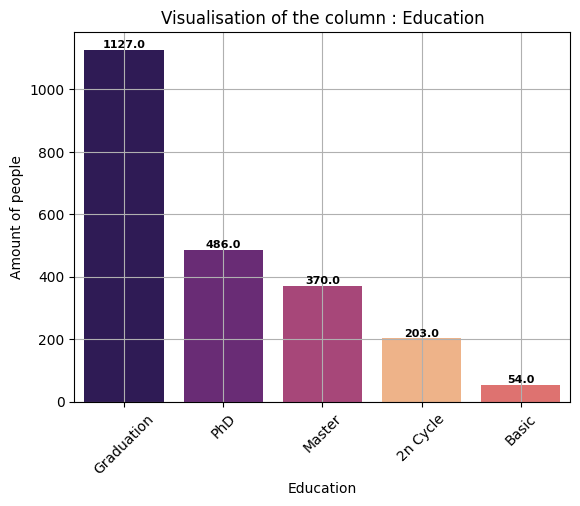

In [9]:
categorical_visualisation("Education")

As we can see, most of people are graduate with a diploma, a lot of them are not specified maybe Bachelor, Master or Phd but not specified.

Let's categorie them in 3 parts : No degree, graduate and post graduate

In [10]:
df["Education"]=df["Education"].replace({"Basic":"No Degree","2n Cycle":"No Degree", "Graduation":"Graduate", "Master":"Post graduate", "PhD":"Post graduate"})

In [11]:
# We will calculate the amount of people without university degree :

print(f"The percentage of people who is not graduate : {round((df['Education'].value_counts()['No Degree']/len(df))*100,2)} %")
print(f"The percentage of people who is graduate but don't have university degree : {round((df['Education'].value_counts()['Graduate']/len(df))*100,2)} %")
print(f"The percentage of people who is graduate with university degree : {round((df['Education'].value_counts()['Post graduate']/len(df))*100,2)} %")

The percentage of people who is not graduate : 11.47 %
The percentage of people who is graduate but don't have university degree : 50.31 %
The percentage of people who is graduate with university degree : 38.21 %


Visualisation of the Value for Education: 

Education
Graduate         1127
Post graduate     856
No Degree         257
Name: count, dtype: int64


Graphic of the visualisation for Education: 



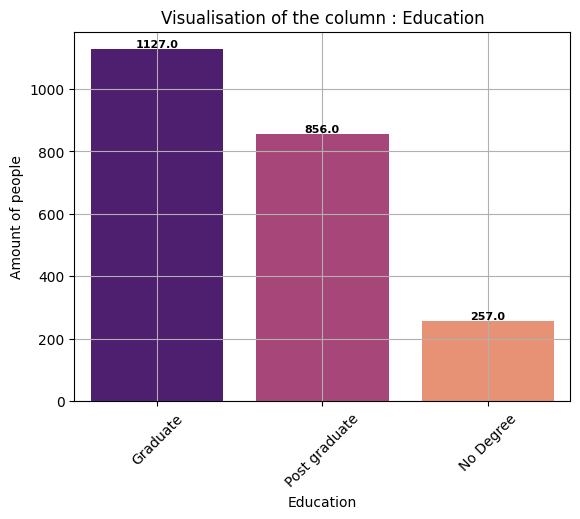

In [12]:
categorical_visualisation("Education")

In [13]:
# Easier for the visualisation
education_df = df.groupby(['Education']).sum()
education_df = education_df[['Fish','Wines','Fruits','Meat','Sweets','Gold']]
education_df

,Fish,Wines,Fruits,Meat,Sweets,Gold
Education,,,,,,
Graduate,48630,320371,34683,202284,35351,57307
No Degree,10560,40622,6478,29293,7607,10652
Post graduate,24867,319823,17756,142391,17663,30650


<ipython-input-8-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-8-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-8-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-8-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-8-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fix

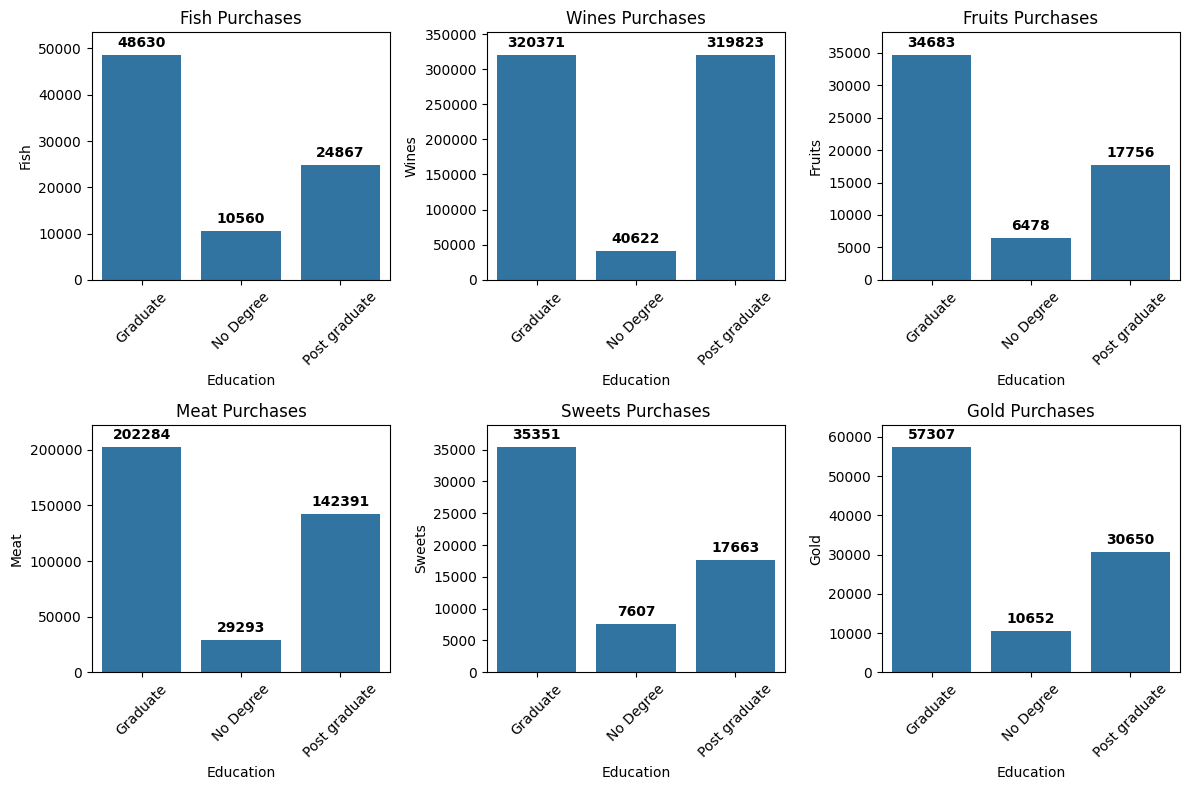

In [14]:
visualisation_groupby(education_df)

## Column : Marital status

Visualisation of the Value for Marital_Status: 

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Graphic of the visualisation for Marital_Status: 



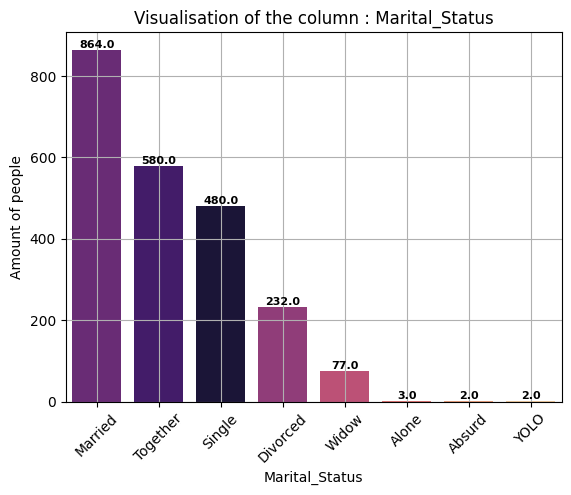

In [15]:
categorical_visualisation("Marital_Status")

Let's check too the type of product they mainly want to buy by Marital_Status.
As we did for education, we will do the same here in 2 categories : Single, in relationship

In [16]:
df['Marital_Status']=df['Marital_Status'].replace({"Absurd":"Single",
                                                   "Alone":"Single",
                                                   "Divorced":"Single",
                                                   "Married":"In relationship",
                                                   "Single":"Single",
                                                   "Together":"In relationship",
                                                   "Widow":"Single",
                                                   "YOLO":"Single"
                                                   })

In [17]:
# We will calculate the amount of people in relationship and single in our analyse :

print(f"The percentage of people in relationship is : {round((df['Marital_Status'].value_counts()['In relationship']/len(df))*100,2)} %")
print(f"The percentage of people single is : {round((df['Marital_Status'].value_counts()['Single']/len(df))*100,2)} %")

The percentage of people in relationship is : 64.46 %
The percentage of people single is : 35.54 %


Visualisation of the Value for Marital_Status: 

Marital_Status
In relationship    1444
Single              796
Name: count, dtype: int64


Graphic of the visualisation for Marital_Status: 



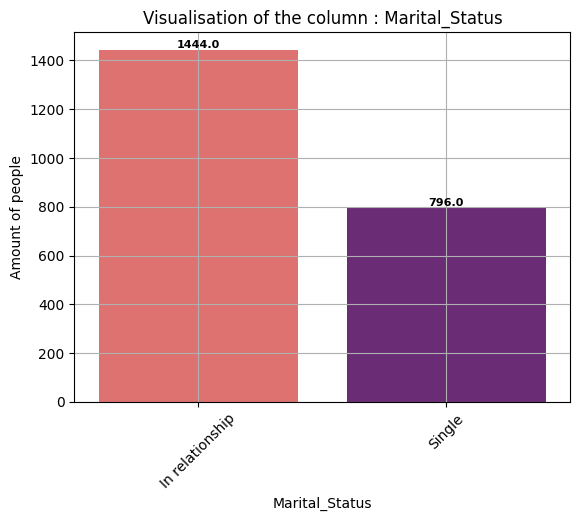

In [18]:
categorical_visualisation("Marital_Status")

In [19]:
# Easier for the visualisation
marital_df = df.groupby(['Marital_Status']).sum()
marital_df = marital_df[['Fish','Wines','Fruits','Meat','Sweets','Gold']]
marital_df

,Fish,Wines,Fruits,Meat,Sweets,Gold
Marital_Status,,,,,,
In relationship,53184,436710,36938,236329,38221,61936
Single,30873,244106,21979,137639,22400,36673


<ipython-input-8-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-8-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-8-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-8-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df.index, rotation=45)
<ipython-input-8-961a8d0fd29b>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fix

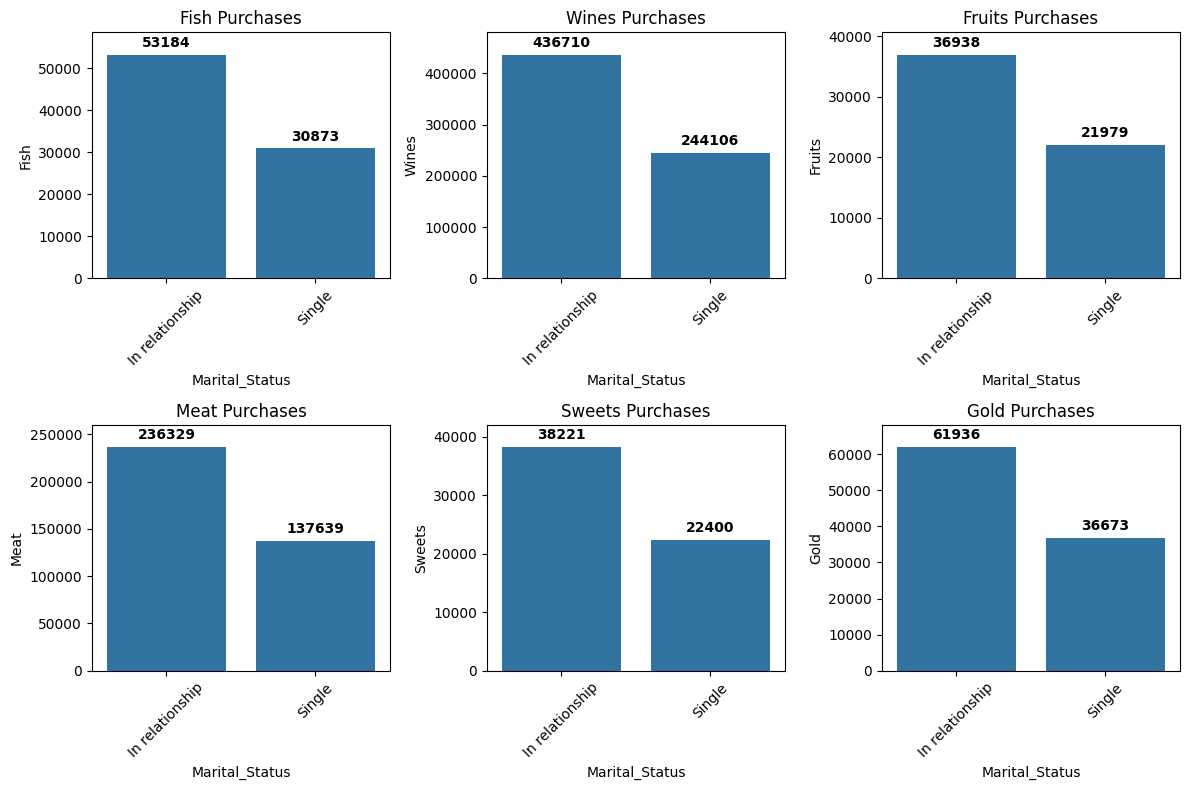

In [20]:
visualisation_groupby(marital_df)

## Column : Complain

As we can see most of our customer are in relationship

Visualisation of the Value for Complain: 

Complain
0    2219
1      21
Name: count, dtype: int64


Graphic of the visualisation for Complain: 



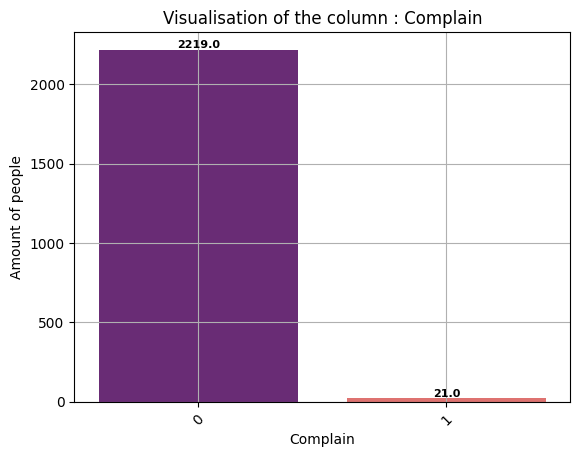

In [21]:
categorical_visualisation("Complain")

In [22]:
# We will calculate the amount of people unhappy in our analyse :

unhappy_user =  (df[df['Complain'] == 1].value_counts())
print(f"The percentage of people unhappy is : {round(((len(unhappy_user) / len(df))*100),2)} %")

The percentage of people unhappy is : 0.94 %


As we can see less than 1% of people are unhappy, it will be good to investigate why they are unhappy, and if we can find a reason why.

In [23]:
unhappy_user

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,
255,1951,Graduate,Single,22263.0,1,1,30-03-2014,31,17,0,2,0,0,2,2,1,0,3,6,0,0,0,0,0,1,3,11,0,1
7192,1955,Graduate,In relationship,65748.0,0,1,15-04-2013,58,172,73,93,95,78,34,2,2,4,10,1,0,0,0,0,0,1,3,11,0,1
10971,1977,Graduate,Single,37774.0,2,0,03-09-2012,28,173,8,107,7,2,176,4,7,2,3,9,1,0,0,0,0,1,3,11,1,1
10637,1964,Graduate,In relationship,40800.0,1,2,01-01-2013,77,24,0,27,8,30,10,2,3,0,3,7,0,0,0,0,0,1,3,11,0,1
10401,1976,No Degree,In relationship,26326.0,0,0,04-09-2013,12,1,0,5,0,3,9,1,0,0,3,3,0,0,0,0,0,1,3,11,0,1
9916,1954,Graduate,In relationship,38998.0,1,1,03-11-2012,92,34,1,14,0,0,5,3,2,0,3,8,0,0,0,0,0,1,3,11,0,1
9500,1959,Graduate,In relationship,58113.0,0,1,25-01-2013,66,221,104,169,102,78,84,3,9,2,8,7,0,0,0,0,0,1,3,11,0,1
9483,1959,Graduate,In relationship,57957.0,0,1,19-08-2013,24,290,59,177,77,5,29,7,4,6,8,3,0,0,0,0,0,1,3,11,0,1
7966,1959,Graduate,Single,80982.0,1,1,08-01-2013,48,505,137,401,104,22,22,3,11,5,11,5,0,0,0,0,0,1,3,11,0,1


# Feature Engineering

In this section, we will create some column to help us for our analyse.

## The user is parent?

In [24]:
# We are Creating a column 'IsParent' based on Kidhome and Teenhome :
df['IsParent'] = df.apply(lambda row: 1 if row['Kidhome'] > 0 or row['Teenhome'] > 0 else 0, axis=1)

In [25]:
isparent_user =  (df[df['IsParent'] == 1].value_counts())
print(f"The percentage of people who are parent is : {round(((len(isparent_user) / len(df))*100),2)} %")

The percentage of people who are parent is : 70.67 %


Visualisation of the Value for IsParent: 

IsParent
1    1602
0     638
Name: count, dtype: int64


Graphic of the visualisation for IsParent: 



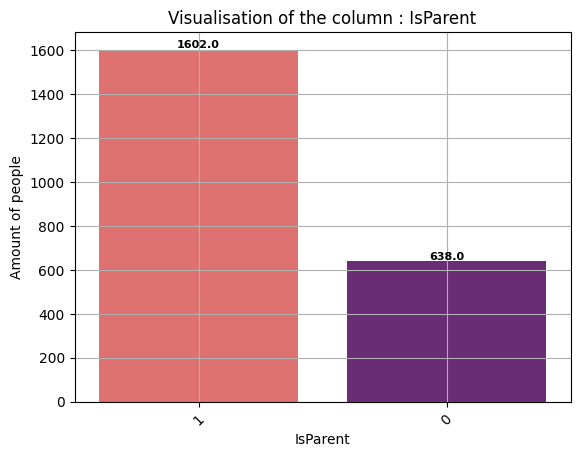

In [26]:
categorical_visualisation('IsParent')

## Age of the User

The dataset was made in 2021, so I will consider the date max is 2021.

In [27]:
df['Age_of_user'] = 2021 - df['Year_Birth']

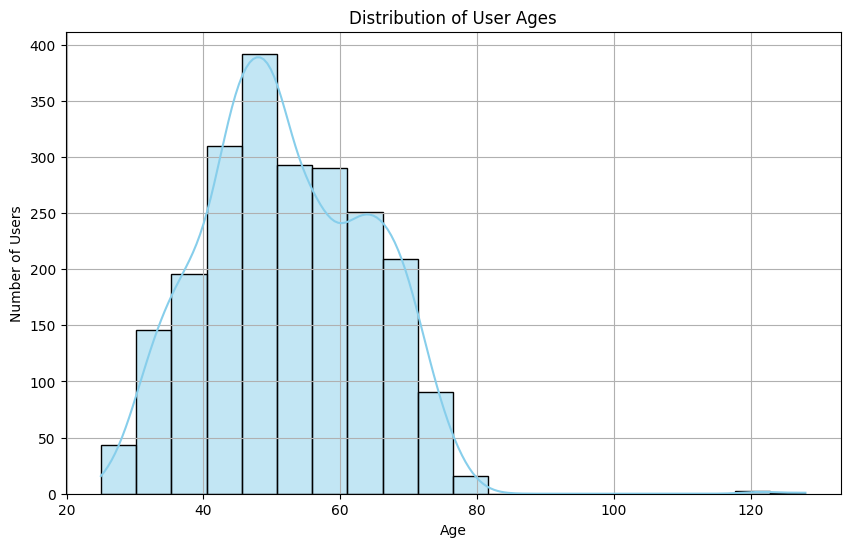

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age_of_user'], kde=True, bins=20, color='skyblue')  # Use histplot for age distribution (better for me)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

In [29]:
print(f"The average age of the user is : {round(df['Age_of_user'].mean(),2)} years")
print(f"The younger user is : {round(df['Age_of_user'].min(),2)} years")
print(f"The older user is : {round(df['Age_of_user'].max(),2)} years")

The average age of the user is : 52.19 years
The younger user is : 25 years
The older user is : 128 years


Something is off here, The older one is 128 years, which is impossible..

## Number of Kids

In [30]:
df['Number of Kids'] = df['Kidhome'] + df['Teenhome']

Visualisation of the Value for Number of Kids: 

Number of Kids
1    1128
0     638
2     421
3      53
Name: count, dtype: int64


Graphic of the visualisation for Number of Kids: 



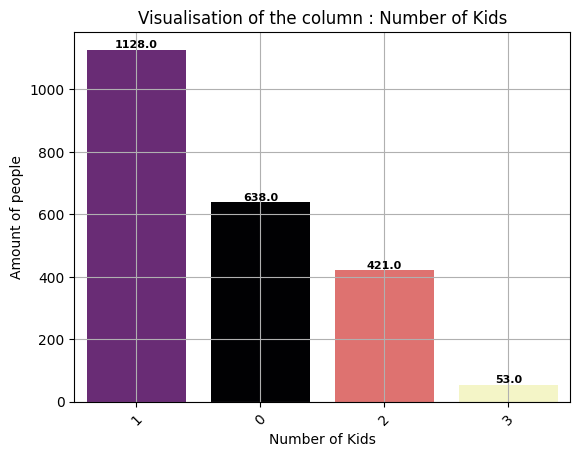

In [31]:
categorical_visualisation('Number of Kids')

As we can see, a lot of people don't have or have only 1 child.

## Create a column for the frequency first buy and last buy

The way to create with type of column will be usefull later if we want to make a RFM

## Removing some column with the same data

In [32]:
df.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweets',
 'Gold',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'IsParent',
 'Age_of_user',
 'Number of Kids']

For our Analyse we will remove some column here because we will not use them for example Year_birth is similar to Age_of_user.

In [33]:
# Remove some columns, I will update this list step by step
to_drop = ["Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [34]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,IsParent,Age_of_user,Number of Kids
0,Graduate,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,3,11,1,0,64,0
1,Graduate,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,3,11,0,1,67,2
2,Graduate,In relationship,71613.0,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,3,11,0,0,56,0
3,Graduate,In relationship,26646.0,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,3,11,0,1,37,1
4,Post graduate,In relationship,58293.0,1,0,19-01-2014,94,173,43,118,...,0,0,0,0,3,11,0,1,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,In relationship,61223.0,0,1,13-06-2013,46,709,43,182,...,0,0,0,0,3,11,0,1,54,1
2236,Post graduate,In relationship,64014.0,2,1,10-06-2014,56,406,0,30,...,0,1,0,0,3,11,0,1,75,3
2237,Graduate,Single,56981.0,0,0,25-01-2014,91,908,48,217,...,0,0,0,0,3,11,0,0,40,0
2238,Post graduate,In relationship,69245.0,0,1,24-01-2014,8,428,30,214,...,0,0,0,0,3,11,0,1,65,1
